In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings("ignore")

google = yf.Ticker("GOOG")

In [11]:
df = google.history(period='1d', interval="1m")
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2023-05-24 09:30:00-04:00,121.879997,121.959999,121.570000,121.809998,1126260,0.0,0.0
2023-05-24 09:31:00-04:00,121.830002,122.050003,121.809998,121.824997,131330,0.0,0.0
2023-05-24 09:32:00-04:00,121.830002,121.930000,121.739998,121.849998,116745,0.0,0.0
2023-05-24 09:33:00-04:00,121.864998,122.050003,121.760002,121.959999,184071,0.0,0.0
2023-05-24 09:34:00-04:00,121.959999,122.250000,121.839996,122.209999,107252,0.0,0.0


In [12]:
df = google.history(period='1d', interval="1m")
df = df[['Low']]
df.head()

,Low
Datetime,
2023-05-24 09:30:00-04:00,121.570000
2023-05-24 09:31:00-04:00,121.809998
2023-05-24 09:32:00-04:00,121.739998
2023-05-24 09:33:00-04:00,121.760002
2023-05-24 09:34:00-04:00,121.839996


In [13]:
df['date'] = pd.to_datetime(df.index).time
df.set_index('date', inplace=True)
df.head()

,Low
date,
09:30:00,121.570000
09:31:00,121.809998
09:32:00,121.739998
09:33:00,121.760002
09:34:00,121.839996


In [14]:
X = df.index.values
y = df['Low'].values
# The split point is the 10% of the dataframe length
offset = int(0.10*len(df))
X_train = X[:-offset]
y_train = y[:-offset]
X_test  = X[-offset:]
y_test  = y[-offset:]

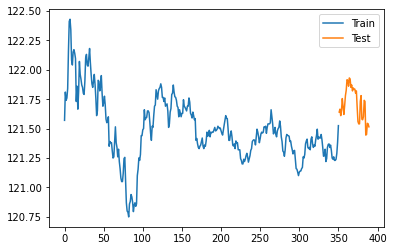

In [15]:
plt.plot(range(0,len(y_train)),y_train, label='Train')
plt.plot(range(len(y_train),len(y)),y_test,label='Test')
plt.legend()
plt.show()

In [16]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(y_train, order=(5,0,1)).fit()
forecast = model.forecast(steps=1)[0]

In [17]:
print(f'Real data for time 0: {y_train[len(y_train)-1]}')
print(f'Real data for time 1: {y_test[0]}')
print(f'Pred data for time 1: {forecast}')

Real data for time 0: 121.5250015258789
Real data for time 1: 121.64019775390625
Pred data for time 1: 121.53588701535706
